In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.font_manager import _rebuild
_rebuild()
rank = "4"

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 步驟一（替換sans-serif字型）
plt.rcParams['axes.unicode_minus'] = False  # 步驟二（解決座標軸負數的負號顯示問題）


In [2]:
def show_values(pc, fmt="%.2f", **kw):

    #from itertools import izip
    izip = zip
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

In [3]:
def cm2inch(*tupl):

    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [4]:
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels):
    
    # Plot it out
    fig, ax = plt.subplots()    
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.5, cmap='RdBu', vmin=0.0, vmax=1.0)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False, rotation='vertical')
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    #show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    fig.set_size_inches(cm2inch(80, 80))

In [13]:
def main(infile_path, output_picture_path):
    label_headers = u'職業-軍警公教	職業-資訊業	職業-金融業	職業-製造業	職業-服務業	職業-醫療服務業	職業-學生	職業-退休人士	職業-餐飲旅館/旅遊業	職業-量販店	職業-政治性職務	職業-營造/不動產業	職業-進出口貿易	職業-專業服務	職業-民間匯兌業/虛擬貨幣產業	職業-武器設備業	職業-非營利機構	職業-高單價物品之買賣或拍賣	職業-當鋪/銀樓	職業-學齡前	職業-家管	職業-待業中	職業-自營商	職業-其他	職務-基層職員	職務-專業人員	職務-技術人員	職務-中階主管	職務-高階主管	職務-企業負責人	職務-其他	學歷-國中(含以下)	學歷-高中	學歷-專科	學歷-大學	學歷-碩士/博士 	婚姻狀況-未婚	婚姻狀況-已婚有子女	婚姻狀況-已婚無子女	投資目的-閒置資金運用	投資目的-節稅	投資目的-儲備退休金	投資目的-子女教育基金	投資目的-追求長期投資報酬	投資目的-資金調度	投資目的-其他	投資基金來源-薪資收入	投資基金來源-退休金	投資基金來源-投資收益	投資基金來源-繼承/贈與	投資基金來源-借貸	投資基金來源-出售資產	投資基金來源-租賃收入	投資基金來源-自營收入	投資基金來源-其他	家庭年收入-50 萬元以下	家庭年收入-50 萬元~100 萬元	家庭年收入-100 萬元~300 萬元	家庭年收入-300 萬元~500 萬元	家庭年收入-500 萬元以上	家庭年支出-50 萬元以下	家庭年支出-50 萬元~100 萬元	家庭年支出-100 萬元~300 萬元	家庭年支出-300 萬元~500 萬元	家庭年支出-500 萬元以上	預計(單筆)投資金額-100 萬元以下	預計(單筆)投資金額-100 萬元~300 萬元	預計(單筆)投資金額-300 萬元以上	特殊身分客戶-70 歲以上	特殊身分客戶-國中畢業以下	特殊身分客戶-領有全民健康保險重大傷病證明	年齡-75 歲以上/20歲以下	年齡-66~75歲	年齡-56~65歲	年齡-46~55歲	年齡-20~45歲	曾經持有投資產品-現金、存款、定存、貨幣型基金與保本型基金	曾經持有投資產品-債券、投資等級之債券基金	曾經持有投資產品-外幣存款、非投資等級之債券基金、平衡型基金、新興市場債券基金	曾經持有投資產品-股票、全球股票基金、歐美成熟國家股票基金、投資型保單	曾經持有投資產品-新興市場股票基金、單一新興國家股票基金、衍生性商品	基金投資目的偏好-現金、存款、定存、貨幣型基金與保本型基金	基金投資目的偏好-債券、投資等級之債券基金	基金投資目的偏好-外幣存款、非投資等級之債券基金、平衡型基金、新興市場債券基金	基金投資目的偏好-股票、全球股票基金、歐美成熟國家股票基金、投資型保單	基金投資目的偏好-新興市場股票基金、單一新興國家股票基金、衍生性商品	備用金相當家庭開銷-無備用金	備用金相當家庭開銷-3 個月以下	備用金相當家庭開銷-介於3~6 個月	備用金相當家庭開銷-介於6~9 個月	備用金相當家庭開銷-超過9 個月	基金投資方式-不曾投資過	基金投資方式-只買過貨幣型基金	基金投資方式-定時定額	基金投資方式-單筆(不含貨幣型基金)和定時定額兩者都有	基金投資方式-單筆或私募基金	期望投資報酬率-1%~2%	期望投資報酬率-3%~5%	期望投資報酬率-6%~8%	期望投資報酬率-9%~12%	期望投資報酬率-12%以上	最大投資損失-1%~2%	最大投資損失-3%~5%	最大投資損失-6%~8%	最大投資損失-9%~12%	最大投資損失-12%以上'.split('	')
    npd = np.genfromtxt(infile_path, delimiter=',', encoding='utf-8')
    #print(npd)

    temp = np.delete(npd,0,axis=0)
    ten=np.delete(temp,0,axis=1)
    #print('labels:\n{0}'.format(ten))

    cooccurrence_matrix = np.dot(ten.transpose(),ten)
    #print('\ncooccurrence_matrix:\n{0}'.format(cooccurrence_matrix))

    cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
    diag = pd.DataFrame(data=cooccurrence_matrix_diagonal, columns = ["freq"])
    diag.insert(0, column='label_headers', value = label_headers)
    diag.to_csv('co-occurrence_matrix_diag_'+rank+'.csv', index=False, encoding='utf-8')
    
    
    with np.errstate(divide='ignore', invalid='ignore'):
        cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
    #print('\ncooccurrence_matrix_percentage:\n{0}'.format(cooccurrence_matrix_percentage))

    print(cooccurrence_matrix_percentage==cooccurrence_matrix_percentage.T)
    
    label_header_with_count = [ '{0} ({1})'.format(label_header, cooccurrence_matrix_diagonal[label_number]) for label_number, label_header in enumerate(label_headers)]  
    #print('\nlabel_header_with_count: {0}'.format(label_header_with_count))
    
    #save co-occurrence_matrix
    dt = pd.DataFrame(data=cooccurrence_matrix_percentage, columns=label_headers)
    dt.insert(0, column='label_headers', value = label_headers)
    dt.to_csv('co-occurrence_matrix_'+rank+'.csv', index=False, encoding='utf-8')
    abc = pd.read_csv('co-occurrence_matrix_'+rank+'.csv', encoding='utf-8', index_col="label_headers")
    
    
    #heatmap
    x_axis_size = cooccurrence_matrix_percentage.shape[0]
    y_axis_size = cooccurrence_matrix_percentage.shape[1]
    title = "Co-occurrence matrix\n"
    xlabel= ''#"Labels"
    ylabel= ''#"Labels"
    xticklabels = label_header_with_count
    yticklabels = label_header_with_count
    heatmap(cooccurrence_matrix_percentage, title, xlabel, ylabel, xticklabels, yticklabels)
    plt.savefig(output_picture_path, dpi=300, format='png', bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures
    plt.show()

[[ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [False False False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


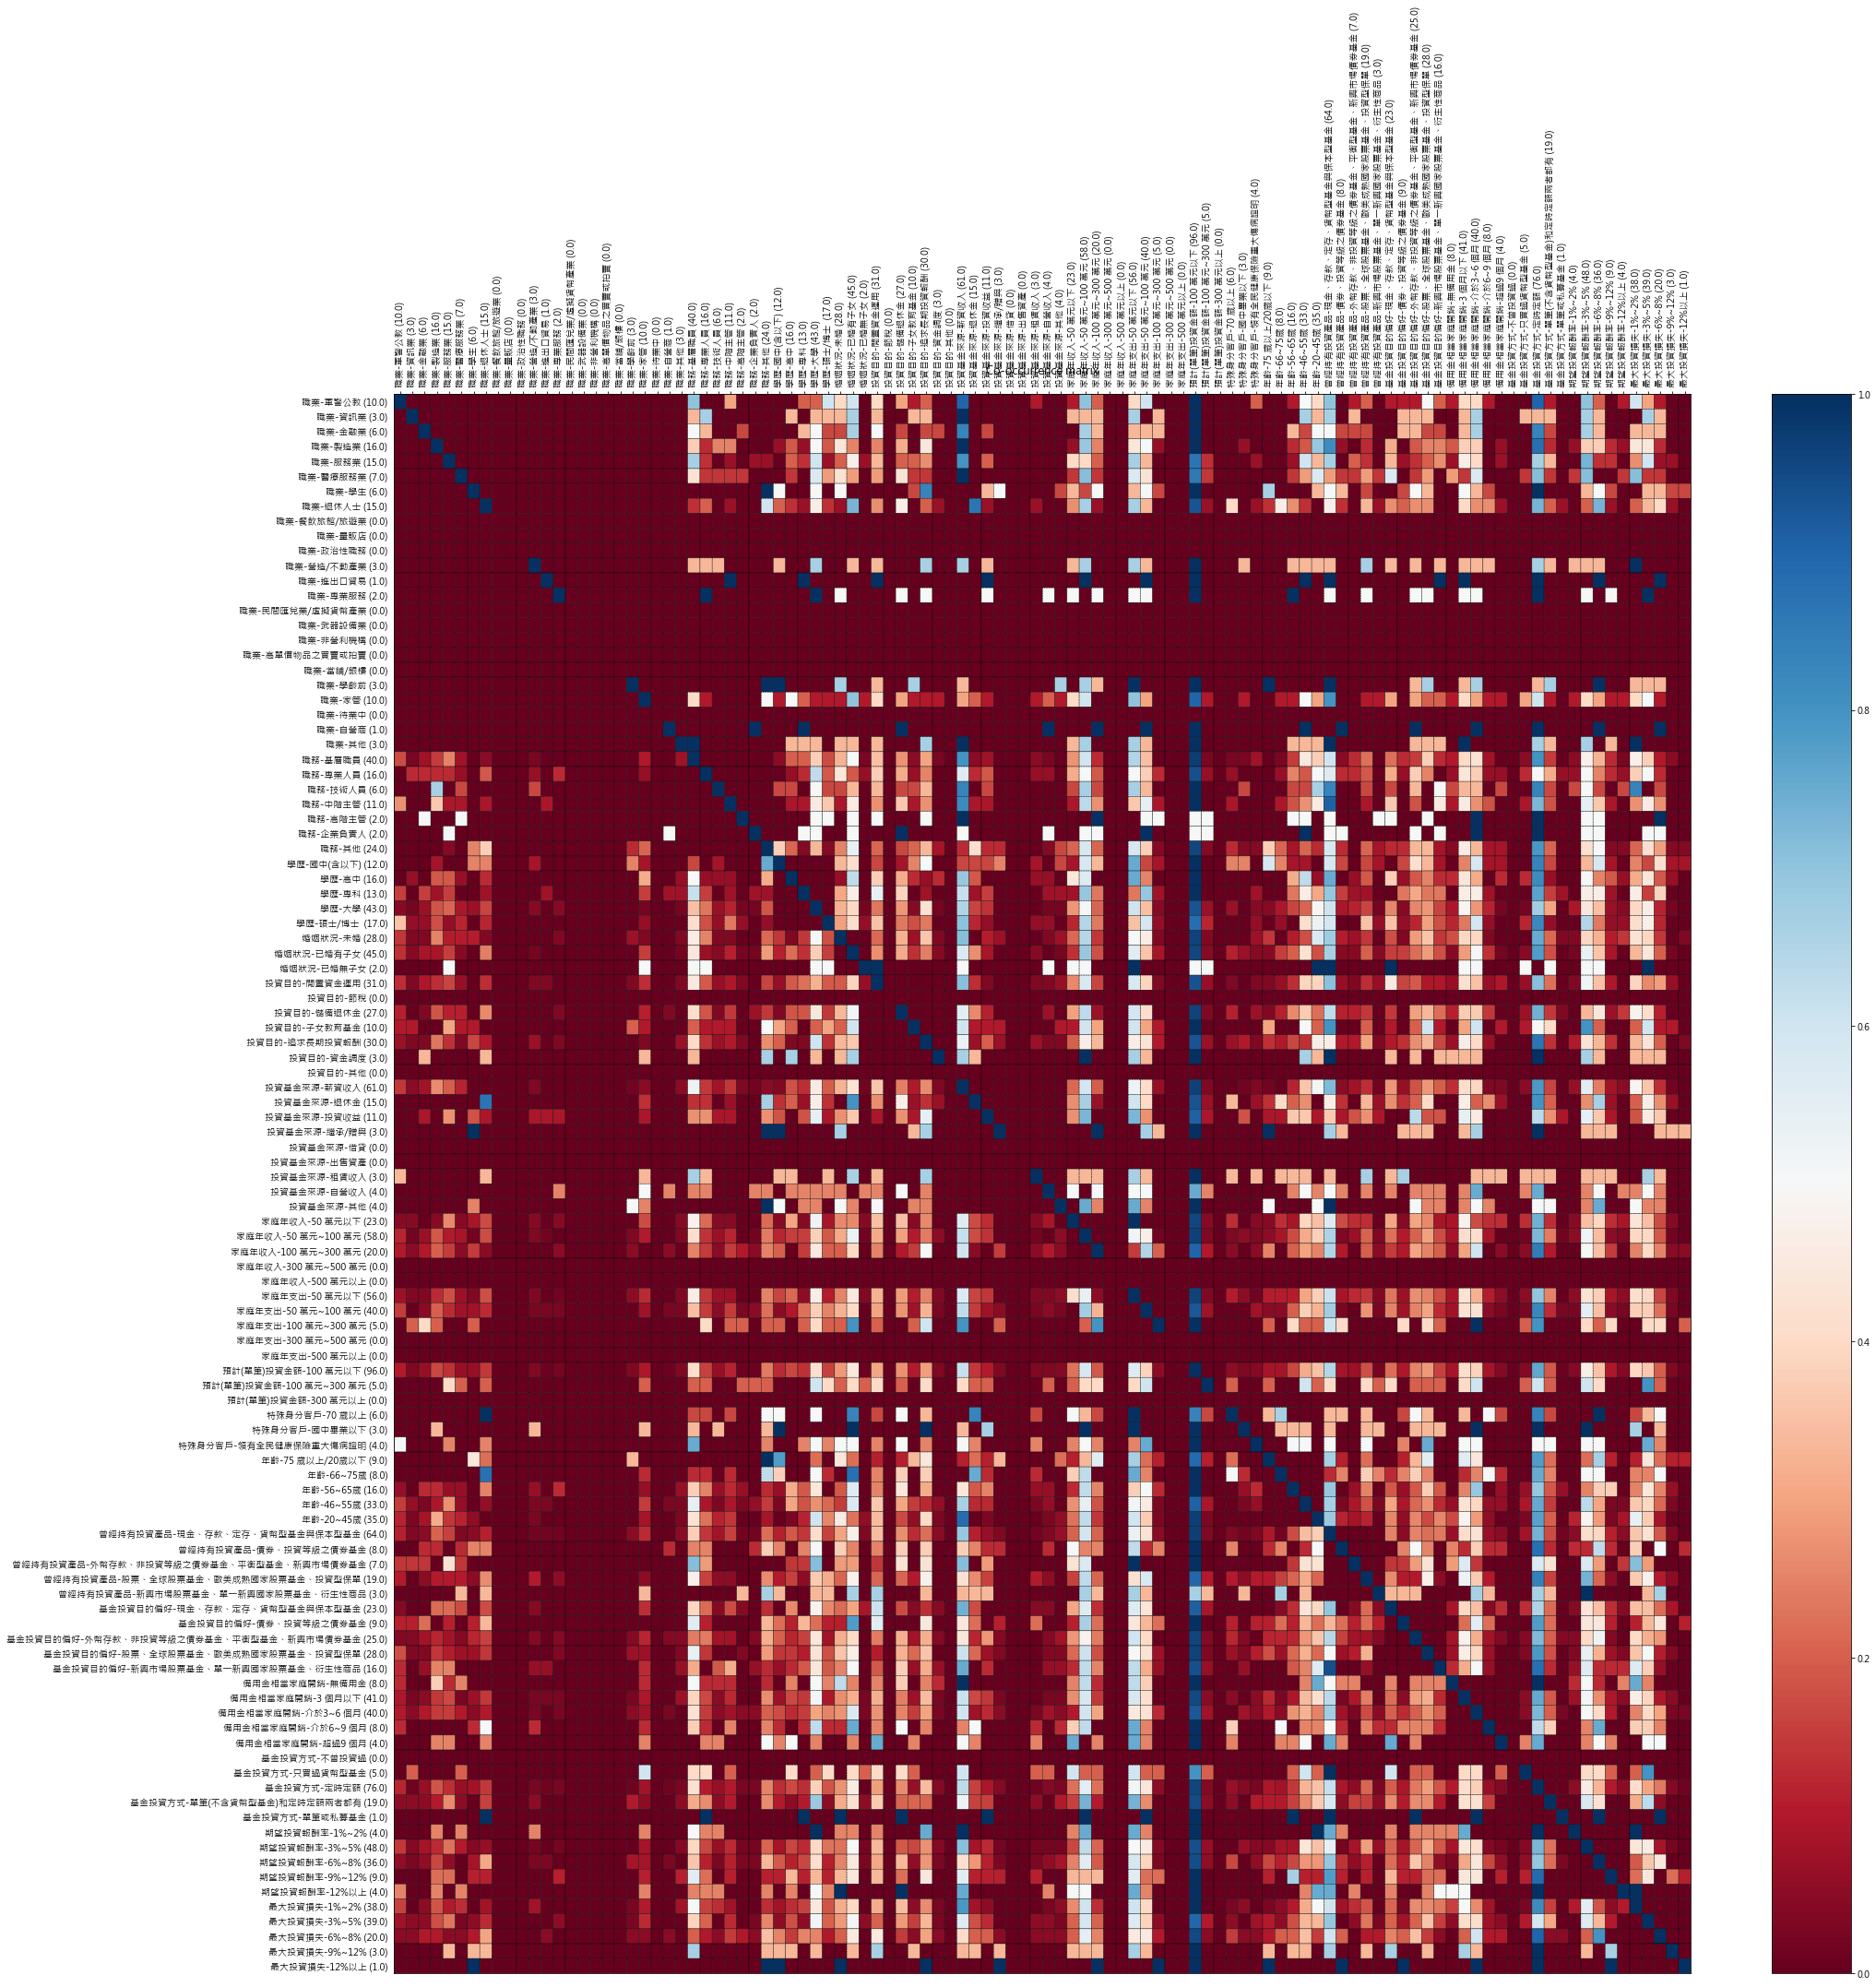

In [14]:
if __name__ == "__main__":
    main('client_vec_'+rank+'.csv', 'heatmap_output_'+rank+'.png')